## Section 1 : Theoretical Questions

### Question 1.a

Having **n** as the upper bound and **m** as the number of  samples that we have , Time complexity of the basic perceptron algorithm is **O(n*m)**.

### Question 1.b

The space complexity of the basic perceptron algorithm is **O(m)**

## Section 1 : Imports And Implementation

In [413]:
!pip install numpy==1.19.5
!pip install scikit-learn==0.22.2
!pip install matplotlib==3.2.2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [414]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [415]:
def perceptron(data, y, n):
  W = np.zeros(data.shape[1])
  W_t = W
  for t in range(n):
    for X,Y in zip(data,y):
      if  Y * np.inner(X,W) <= 0 :
        W_t = W
        W = W + Y * X
    if np.allclose(W,W_t):
      return W
  return W

def plot_prediction(x, y, w):
    plt.figure()
    plt.grid(True)
    y = np.array(y).reshape(-1)
    plt.scatter(x[y == -1][:,0], x[y == -1][:, 1] , label='LabelY = -1',marker='x')
    plt.scatter(x[y == 1][:,0], x[y == 1][:, 1], label = 'LabelY = 1',marker='x')
    x_max = max(x[:,0].max(), -x[:,0].min()) 
    y_max = max(x[:,1].max(), -x[:,1].min()) 
    x_boundary = np.linspace(-x_max, x_max, 1000)
    y_boundary = -1 * w[0] / w[1] * x_boundary
    plt.plot(x_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],y_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],label = 'decision boundary',color='green')
    plt.legend()

def predict_class(X, w):
    pred = np.inner(X,w) 
    if pred > 0 :
        return 1
    else:
        return -1

def calculate_accuracy(x,y,w):
    error = 0
    for i, xi in enumerate(x):
        prediction = predict_class(xi, w)
        if (prediction != y[i]):
            error += 1/len(x)
    return 1-error




### Dataset preparation

In [416]:
mean1= [-1, 0]
mean2= [1, 0]
cov =0.25 * np.eye(2) 

#Creating labels
y=[]
y[:125]=[-1]*125
y[125:]=[1]*125

#Creating dataset
data= np.concatenate( (np.random.multivariate_normal(mean1, cov, 125) , np.random.multivariate_normal(mean2,cov, 125))  )

print(data[:5])
print(y[120:130])

[[-1.99048992 -0.72624304]
 [-0.49373222 -0.44124046]
 [-0.81991588  0.16764064]
 [-0.67919133  0.22855476]
 [-0.70252198 -0.60684231]]
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]


In [417]:
#Shuffling data
data, y = shuffle(data, y)

print(data[:5])
print(y[120:130])

[[-2.05724286  0.61147917]
 [ 0.98235519 -0.5972168 ]
 [ 0.78166091  0.273605  ]
 [-1.41849222 -0.13400285]
 [ 1.85487747  0.30667892]]
[-1, 1, 1, 1, -1, -1, 1, -1, -1, 1]


In [418]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.2, random_state=42)

### Experiment 1

In [419]:
ex1 = perceptron(X_train, Y_train, 1000)
print(ex1)

[ 0.72239424 -0.15893398]


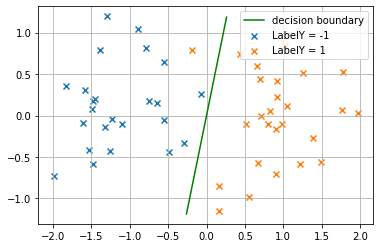

In [420]:
plot_prediction(X_test,Y_test,ex1)

### Question 1:
- The algorithm does converge because the variance is too small which makes the samples very similar. Therefore it would be easy to separate them linearally.

### Question 2:
- The boundary is not unique since it depends on many parameters(dataset, training/testing data,variance,..).
- Changing the initialisation will change the result of the algorithm.

### Question 3:


In [421]:
acc1=calculate_accuracy(X_test,Y_test,ex1)
print("Accuracy_experiment1 = "+ str(acc1))

Accuracy_experiment1 = 0.98


## Experiment 2: 

In [422]:
cov = 0.75 * np.eye(2) 
data= np.concatenate( (np.random.multivariate_normal(mean1, cov, 125) , np.random.multivariate_normal(mean2,cov, 125)) )
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [423]:
ex2 = perceptron(X_train, Y_train, 1000)

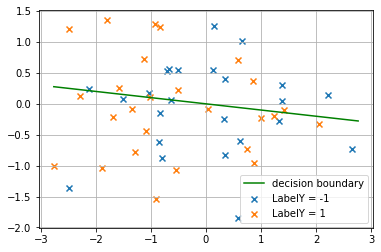

In [424]:
plot_prediction(X_test,Y_test,ex2)

### Question 1:
- The algorithm doesn't converge because the variance is too high. Therefore it would be hard to separate them linearally.

### Question 2:
- The boundary is not unique since it depends on many parameters:In this experiemnt we have changed the value of the variance and as we can see the boundary took a new direction.
- Changing the initialisation will change the result of the algorithm generally .But in this case, it would still be hard to get ss clear classification with such variance.

### Question 3:

In [425]:
acc2=calculate_accuracy(X_test,Y_test,ex2)
print("Accuracy_experiment2 = "+ str(acc2))

Accuracy_experiment2 = 0.43999999999999984


### Conclusion:
- Based on the results of the previous experiments:
        -Changing the value of the variance will impact the efficiency of the perceptron algorithm.
        -The smaller the value is ,the bette the classification ( accuracy_exp1 > accuracy_exp2 )

sigmas
[0.01, 0.1, 0.5, 0.7, 1]
mean_error
[0.0, 0.0, 0.10666666666666665, 0.22666666666666668, 0.18666666666666665]
variance_error
[0.0, 0.0, 0.0006222222222222233, 0.0046222222222222255, 0.0006222222222222214]


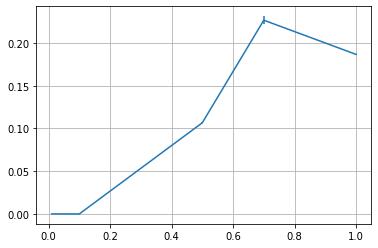

In [426]:
sigmas=[0.01,0.1,0.5,0.7,1]
mean_err=[]
variance_err=[]
for sigma in sigmas:
  errors=[]
  for i in range(3):
    #preparing data
    mean1= [-1, 0]
    mean2= [1, 0]
    cov = sigma * np.eye(2)
    y=[]
    y[:125]=[-1]*125
    y[125:]=[1]*125
    data= np.concatenate( (np.random.multivariate_normal(mean1, cov, 125) , np.random.multivariate_normal(mean2,cov, 125))  )
    data, y = shuffle(data, y)
    X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    #perceptron algorithm
    exp= perceptron(X_train, Y_train, 1000)
    #calculating errors
    err=1-calculate_accuracy(X_test,Y_test,exp)
    errors.append(err)
  mean_err.append(np.mean(errors))
  variance_err.append(np.var(errors))
print("sigmas")
print(sigmas)
print("mean_error")
print(mean_err)
print("variance_error")
print(variance_err)

plt.errorbar(x=sigmas, y=mean_err, yerr=variance_err)
plt.grid(True)
plt.show()

### Conclusion
- Based on the results above, the more the variance increases the more errors we have => Toget a clear linear seperation, we need a small value of variance(more similar instances for a better training).

